In [1]:
# pip install scikit-learn
# pip install pyreadr

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the database
result = pyreadr.read_r('../01_data/minorities_discrimination_survey.RData')  

In [3]:
print(result.keys())  

odict_keys(['min_dis'])


In [4]:
# Activate automatic conversion from R to pandas
df1 = result["min_dis"] # extract the pandas data frame for object df1

In [5]:
df1.head()

,za_nr,version,doi,country,DEGURBA,ALTURBA,C1,C2,C3,typint,...,dis5_4_other,dis12overall10,dis5overall9,redisOverall,res_stat,sec_res,SI03_2_H_stat,SI03_3_H,pweightadj,hweightadj
0,6703.0,1.0.0 (2020-07-29),doi:10.4232/1.13514,1.0,1.0,NaN,1.0,2.0,2.0,1.0,...,0.0,1.0,1.0,NaN,3.0,1.0,0.0,15.0,0.075758,0.115287
1,6703.0,1.0.0 (2020-07-29),doi:10.4232/1.13514,1.0,1.0,NaN,1.0,2.0,2.0,1.0,...,0.0,NaN,0.0,NaN,99.0,2.0,0.0,15.0,NaN,0.115287
2,6703.0,1.0.0 (2020-07-29),doi:10.4232/1.13514,1.0,1.0,NaN,1.0,3.0,2.0,1.0,...,0.0,1.0,1.0,NaN,5.0,2.0,0.0,16.0,0.075758,0.057643
3,6703.0,1.0.0 (2020-07-29),doi:10.4232/1.13514,1.0,1.0,NaN,1.0,3.0,2.0,1.0,...,0.0,NaN,0.0,NaN,99.0,2.0,0.0,16.0,NaN,0.057643
4,6703.0,1.0.0 (2020-07-29),doi:10.4232/1.13514,1.0,1.0,NaN,1.0,3.0,2.0,1.0,...,0.0,NaN,0.0,NaN,99.0,2.0,0.0,16.0,NaN,0.057643


In [1]:
# Manually variables of interest 
db_filtered = [
    'country',
    'country2',
    'DEGURBA',
    'IN02', # Target group
    'IN05', # COUNTRY OF BIRTH (immigrants and their descendants)
    'IN06', # COUNTRY OF BIRTH (Recent immigrants)
    'Generation', # 1st or 2nd generation migrant
    'HH02', # Age
    'HH03', # Gender
    'HH04', # Current situation (Job)
    'HH05', # Is that full-time, part-time or just occasionally?
    'HH06', # Year arrived to live in country
    'HH09_1', # Highest level of education completed? RECODE
    'HH10', # Years spent in education?
    'HH10a', # Currently attending school or vocational training?
    'HH10c', # What is the main reason why you did not continue at school?
    'HLS02', # Do you own or rent this accommodation?
    'RA03_1', # Prevalance of discrimination on the basis of skin colour in [country]
    'RA03_2', # Prevalance of discrimination on the basis of ethnic origin or immigrant background in [country]
    'RA03_3', # Prevalance of discrimination on the basis of religion or religious beliefs in [country]
    'RA04', # Do you know of any organisations in [COUNTRY] that offer support or advice to people who have been discriminated against - for whatever reason?
    'EU01', # In what year was the last time you were in work?
    'EU02', # What was your last job or occupation?
    'EU03', # Are you currently registered as unemployed? 
    'EU05', # Are you currently looking for work?
    'EU07', # Have you ever looked for work in the past 5 years in  [COUNTRY] (or since you have been in [country])?
    'EUD01_01', ### Discriminated when looking for work in the past 5 years: Skin colour 
    'EUD01_02', ### Discriminated when looking for work in the past 5 years:  [ethnic origin or immigrant background / ethnic origin (tailored to target group)] 
    'EUD01_03', ### Discriminated when looking for work in the past 5 years: Religion or religious beliefs 
    'EUD01_04', ### Discriminated when looking for work in the past 5 years: Age (such as being too young or too old) 
    'EUD01_05', ### Discriminated when looking for work in the past 5 years: Sex/gender (such as being a man or a woman) 
    'EUD01_06', ### Discriminated when looking for work in the past 5 years: Disability 
    'EUD01_07', ### Discriminated when looking for work in the past 5 years: Sexual orientation (such as being gay lesbian or bisexual) 
    'EUD01_08', ### Discriminated when looking for work in the past 5 years: Other (please specify) 
    'EUD01_09', ### Discriminated when looking for work in the past 5 years: I haven't felt discriminated against on any ground when looking for work in the past 5 years
    'EUD01_96', ### Discriminated when looking for work in the past 5 years: Refused  
    'EUD01_97', ### Discriminated when looking for work in the past 5 years: Doesn't understand the question 
    'EUD01_99', ### Discriminated when looking for work in the past 5 years: Don't know  
    'EUD06_01', ### Report or complaint made to Police  
    'EA01', ### What is your current job or occupation?
    'EA02', ### "What kind of employment contract do you have in your main job? Is it a…?
    'EA04', ### To what extent does your current job or the work you do correspond to your level of education?
    'EA05', ### How many hours per week do you work in your (main) job? (allow from 0 to 999)
    'EAD01_01', ### Discriminated at work in the past 5 years: Skin colour 
    'EAD01_02', ### Discriminated at work in the past 5 years: [ethnic origin or immigrant background / ethnic origin (tailored to target group)] 
    'EAD01_03', ### Discriminated at work in the past 5 years: Religion or religious beliefs 
    'EAD01_04', ### Discriminated at work in the past 5 years: Age 
    'EAD01_05', ### Discriminated at work in the past 5 years: Sex/gender (such as being a man or a woman) 
    'EAD01_06', ### Discriminated at work in the past 5 years: Disability
    'EAD01_07', ### Discriminated at work in the past 5 years: Sexual orientation  (such as being gay, lesbian or bisexual)
    'EAD01_08', ### Discriminated at work in the past 5 years: Other (please specify)
    'EAD01_09', ### Discriminated at work in the past 5 years: I haven't felt discriminated against on any ground when at work in the past 5 years 
    'EAD01_96', ### Discriminated at work in the past 5 years: Refused  
    'EAD01_97', ### Discriminated at work in the past 5 years: Doesn't understand the question
    'EAD01_99', ### Discriminated at work in the past 5 years: Don't know
    'res_stat', ### Residence and citizenship status
    'id', # unique identification number for a respondent
    'arop', # At risk of poverty after social transfers
    'PB06_01', # What language do you mainly speak at home? Language 1
    'PB04', # Do you usually wear a headscarf or niqab outside the house? 
    'PB01', # What is your religion?

]



In [9]:
# Subset the dataframe with selected variables
df_subset = df1[db_filtered]

# Perform exploratory data analysis on the subset dataframe

df_subset.describe()

,country,country2,DEGURBA,IN02,IN05,IN06,Generation,HH02,HH03,HH04,...,EAD01_08,EAD01_09,EAD01_96,EAD01_97,EAD01_99,res_stat,id,arop,PB04,PB01
count,77656.000000,77656.000000,77656.00000,77656.000000,29582.000000,833.000000,28334.000000,77656.000000,77656.000000,55206.000000,...,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,43871.000000,77656.000000,64910.000000,4693.000000,25515.000000
mean,14.896673,14.397986,1.70981,5.033429,113.913224,149.224490,1.236324,29.239247,1.565069,4.498497,...,0.013424,0.720302,0.025897,0.002851,0.012414,44.785462,38828.500000,0.728347,3.310462,4.773388
std,8.453334,8.350130,0.84086,1.942716,95.907868,73.886583,0.424831,19.416555,2.849093,8.117221,...,0.115083,0.448864,0.158832,0.053320,0.110727,48.164732,22417.500589,0.444815,11.384063,17.924843
min,1.000000,1.000000,1.00000,1.000000,1.000000,29.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,7.000000,7.000000,1.00000,3.000000,28.000000,51.000000,1.000000,13.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19414.750000,0.000000,1.000000,1.000000
50%,14.000000,14.000000,1.00000,5.000000,143.000000,182.000000,1.000000,27.000000,1.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,38828.500000,1.000000,1.000000,1.000000
75%,23.000000,23.000000,3.00000,6.000000,187.000000,212.000000,1.000000,43.000000,2.000000,6.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,99.000000,58242.250000,1.000000,3.000000,2.000000
max,28.000000,28.000000,3.00000,8.000000,999.000000,233.000000,2.000000,85.000000,99.000000,99.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,77656.000000,1.000000,99.000000,99.000000


In [10]:
df_subset.head()

,country,country2,DEGURBA,IN02,IN05,IN06,Generation,HH02,HH03,HH04,...,EAD01_09,EAD01_96,EAD01_97,EAD01_99,res_stat,id,arop,PB06_01,PB04,PB01
0,1.0,1.0,1.0,8.0,117.0,NaN,1.0,37.0,1.0,1.0,...,1.0,0.0,0.0,0.0,3.0,165.0,1.0,SWA,NaN,99.0
1,1.0,1.0,1.0,8.0,117.0,NaN,1.0,30.0,2.0,7.0,...,NaN,NaN,NaN,NaN,99.0,166.0,1.0,SWA,NaN,NaN
2,1.0,1.0,1.0,8.0,117.0,NaN,1.0,30.0,2.0,7.0,...,NaN,NaN,NaN,NaN,5.0,169.0,1.0,SWA,NaN,0.0
3,1.0,1.0,1.0,8.0,117.0,NaN,1.0,38.0,1.0,1.0,...,NaN,NaN,NaN,NaN,99.0,170.0,1.0,SWA,NaN,NaN
4,1.0,1.0,1.0,8.0,NaN,NaN,NaN,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,99.0,171.0,1.0,SWA,NaN,NaN


In [11]:
# Count missing values in the subset dataframe
missing_values_count = df_subset.isnull().sum()

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Display the count of missing values
print("Missing values count:")
print(missing_values_count)

Missing values count:
country           0
country2          0
DEGURBA           0
IN02              0
IN05          48074
IN06          76823
Generation    49322
HH02              0
HH03              0
HH04          22450
HH05          55969
HH06          54841
HH09_1        55477
HH10          55477
HH10a         71967
HH10c         73795
HLS02            16
RA03_1        52141
RA03_2        52141
RA03_3        52141
RA04          52141
EU01          62723
EU02          69660
EU03          63351
EU05          52141
EU07          59188
EUD01_01      64250
EUD01_02      64250
EUD01_03      64250
EUD01_04      64250
EUD01_05      64250
EUD01_06      64250
EUD01_07      64250
EUD01_08      64250
EUD01_09      64250
EUD01_96      64250
EUD01_97      64250
EUD01_99      64250
EUD06_01      77408
EA01          66446
EA02          67899
EA04          66446
EA05          77007
EAD01_01      60820
EAD01_02      60820
EAD01_03      60820
EAD01_04      60820
EAD01_05      60820
EAD01_06      6082

In [12]:
df_subset.apply(pd.isnull).sum()/df_subset.shape[0]

country       0.000000
country2      0.000000
DEGURBA       0.000000
IN02          0.000000
IN05          0.619064
IN06          0.989273
Generation    0.635134
HH02          0.000000
HH03          0.000000
HH04          0.289095
HH05          0.720730
HH06          0.706204
HH09_1        0.714394
HH10          0.714394
HH10a         0.926741
HH10c         0.950281
HLS02         0.000206
RA03_1        0.671436
RA03_2        0.671436
RA03_3        0.671436
RA04          0.671436
EU01          0.807703
EU02          0.897033
EU03          0.815790
EU05          0.671436
EU07          0.762182
EUD01_01      0.827367
EUD01_02      0.827367
EUD01_03      0.827367
EUD01_04      0.827367
EUD01_05      0.827367
EUD01_06      0.827367
EUD01_07      0.827367
EUD01_08      0.827367
EUD01_09      0.827367
EUD01_96      0.827367
EUD01_97      0.827367
EUD01_99      0.827367
EUD06_01      0.996806
EA01          0.855645
EA02          0.874356
EA04          0.855645
EA05          0.991643
EAD01_01   

In [151]:
df_subset.head()

,country,country2,DEGURBA,IN02,IN05,IN06,Generation,HH02,HH03,HH04,...,EAD01_09,EAD01_96,EAD01_97,EAD01_99,res_stat,id,arop,PB06_01,PB04,PB01
0,1.0,1.0,1.0,8.0,117.0,NaN,1.0,37.0,1.0,1.0,...,1.0,0.0,0.0,0.0,3.0,165.0,1.0,SWA,NaN,99.0
1,1.0,1.0,1.0,8.0,117.0,NaN,1.0,30.0,2.0,7.0,...,NaN,NaN,NaN,NaN,99.0,166.0,1.0,SWA,NaN,NaN
2,1.0,1.0,1.0,8.0,117.0,NaN,1.0,30.0,2.0,7.0,...,NaN,NaN,NaN,NaN,5.0,169.0,1.0,SWA,NaN,0.0
3,1.0,1.0,1.0,8.0,117.0,NaN,1.0,38.0,1.0,1.0,...,NaN,NaN,NaN,NaN,99.0,170.0,1.0,SWA,NaN,NaN
4,1.0,1.0,1.0,8.0,NaN,NaN,NaN,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,99.0,171.0,1.0,SWA,NaN,NaN


In [152]:
# Filter the subset to include only people seeking for a job (EU05=1 or EU07=1)
df_subset_job_seekers = df_subset[(df_subset['EU05'] == 1) | (df_subset['EU07'] == 1)]


In [153]:
# Count the number of observations before filtering
before_filter_count = df_subset.shape[0]

# Count the number of observations after filtering
after_filter_count = df_subset_job_seekers.shape[0]

# Print the counts
print("Number of observations before filtering:", before_filter_count)
print("Number of observations after filtering for job seekers:", after_filter_count)

Number of observations before filtering: 77656
Number of observations after filtering for job seekers: 13406


In [180]:
# Define the target variable
discrimination_columns = ['EUD01_01', 'EUD01_02', 'EUD01_03', 'EUD01_04', 'EUD01_05', 'EUD01_06', 
                          'EUD01_07', 'EUD01_08', 'EUD01_09', 'EUD01_96', 'EUD01_97', 'EUD01_99']

# Count occurrences for each variable
for col in discrimination_columns:
    print(df_subset[col].value_counts())

0.0    11234
1.0     2172
Name: EUD01_01, dtype: int64
0.0    9894
1.0    3512
Name: EUD01_02, dtype: int64
0.0    12461
1.0      945
Name: EUD01_03, dtype: int64
0.0    12740
1.0      666
Name: EUD01_04, dtype: int64
0.0    13185
1.0      221
Name: EUD01_05, dtype: int64
0.0    13330
1.0       76
Name: EUD01_06, dtype: int64
0.0    13395
1.0       11
Name: EUD01_07, dtype: int64
0.0    13067
1.0      339
Name: EUD01_08, dtype: int64
1.0    7940
0.0    5466
Name: EUD01_09, dtype: int64
0.0    13342
1.0       64
Name: EUD01_96, dtype: int64
0.0    13381
1.0       25
Name: EUD01_97, dtype: int64
0.0    13199
1.0      207
Name: EUD01_99, dtype: int64


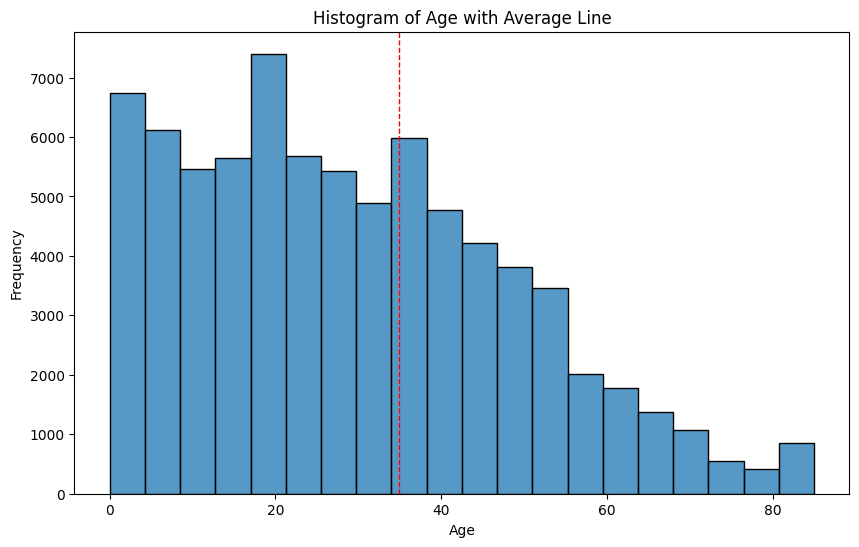

In [124]:
# Calculate the average age
average_age = df_subset_job_seekers['HH02'].mean()

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_subset['HH02'], bins=20)
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=1)  # Add a line for the average
plt.title('Histogram of Age with Average Line')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

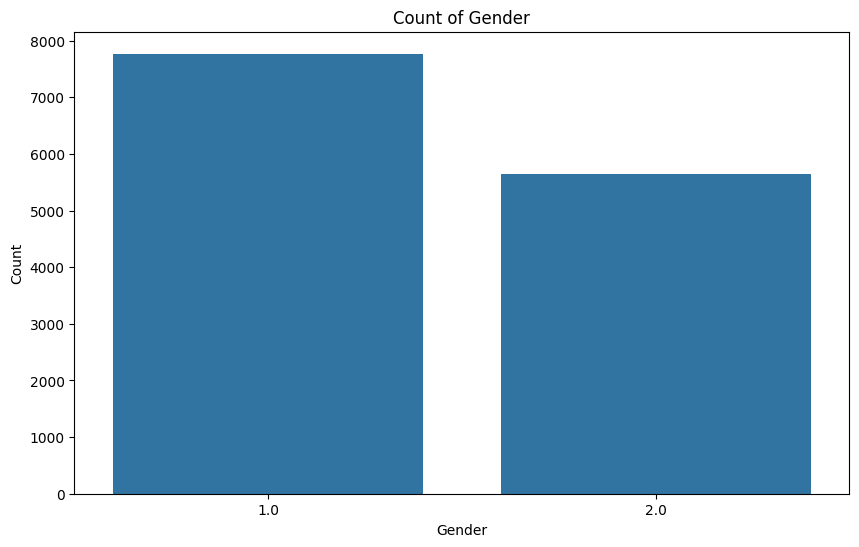

In [125]:
# Example 4: Count plot of a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x='HH03', data=df_subset_job_seekers)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [189]:
# Define the target variable
discrimination_columns = ['EUD01_01', 'EUD01_02', 'EUD01_03', 'EUD01_04', 'EUD01_05', 'EUD01_06', 
                          'EUD01_07', 'EUD01_08']

# Define a function to count the discrimination level
def count_discrimination_level(row):
    discrimination_count = 0
    for col in discrimination_columns:
        # Check if discrimination occurred in each column 
        if row[col] == 1:
            discrimination_count += 1
    return discrimination_count

# Create a copy of the DataFrame
df_subset_copy = df_subset_job_seekers.copy()

# Create the discrimination level variable
df_subset_copy['discrimination_level'] = df_subset_copy.apply(count_discrimination_level, axis=1)

# Display the distribution of the discrimination level
print(df_subset_copy['discrimination_level'].value_counts().sort_index())


0    8236
1    3021
2    1636
3     419
4      78
5      16
Name: discrimination_level, dtype: int64


In [193]:
# Count the total number of job seekers
total_job_seekers = len(df_subset_job_seekers)

# Count the number of job seekers who have suffered at least one type of discrimination
discriminated_job_seekers = df_subset_copy['discrimination_level'].value_counts().sort_index()
discriminated_job_seekers

discriminated_job_seekers_gt_zero = discriminated_job_seekers[discriminated_job_seekers.index > 0].sum()

percentage_discriminated = (discriminated_job_seekers_gt_zero / total_job_seekers) * 100

percentage_discriminated

38.564821721617186

In [169]:
#### See if it is working
# Select a few rows randomly
sample_rows = df_subset_copy.sample(n=5)

# Display the selected rows along with the count of discrimination occurrences
for idx, row in sample_rows.iterrows():
    discrimination_count = sum([row[col] == 1 for col in discrimination_columns])
    print("Row", idx, "has", discrimination_count, "occurrences of discrimination.")


Row 17548 has 0 occurrences of discrimination.
Row 55399 has 0 occurrences of discrimination.
Row 9678 has 0 occurrences of discrimination.
Row 7332 has 0 occurrences of discrimination.
Row 56050 has 0 occurrences of discrimination.


In [170]:
# Get the row with index 34159
row_34159 = df_subset_copy.loc[17548]
row_34159

country                    11.0
country2                    6.0
DEGURBA                     2.0
IN02                        2.0
IN05                      207.0
IN06                        NaN
Generation                  1.0
HH02                       51.0
HH03                        1.0
HH04                        2.0
HH05                        1.0
HH06                     1993.0
HH09_1                      NaN
HH10                        NaN
HH10a                       NaN
HH10c                       NaN
HLS02                       4.0
RA03_1                      3.0
RA03_2                      4.0
RA03_3                      4.0
RA04                        1.0
EU01                        NaN
EU02                        NaN
EU03                        NaN
EU05                        2.0
EU07                        1.0
EUD01_01                    0.0
EUD01_02                    0.0
EUD01_03                    0.0
EUD01_04                    0.0
EUD01_05                    0.0
EUD01_06

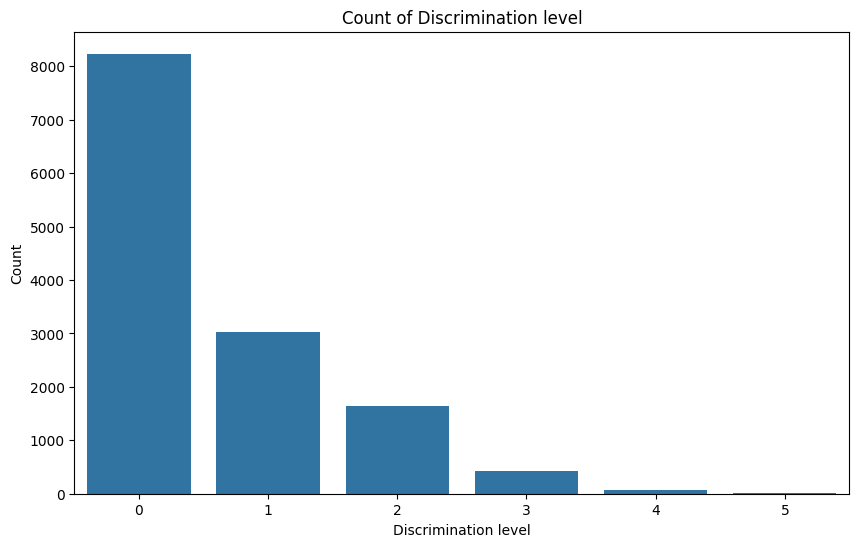

In [194]:
# Count plot of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='discrimination_level', data=df_subset_copy)
plt.title('Count of Discrimination level')
plt.xlabel('Discrimination level')
plt.ylabel('Count')
plt.show()

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df_subset contains your dataset with 'discrimination_level' as the target variable

# Separate features (X) and target variable (y)
X = df_subset_copy.drop('discrimination_level', axis=1)
y = df_subset_copy['discrimination_level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [174]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=1000))])

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/Users/monserratlopez/miniconda3/envs/ML/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/monserratlopez/miniconda3/envs/ML/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Confusion Matrix:
[[1666    0    0    0    0    0]
 [   0  606    0    0    0    0]
 [   0    1  304    0    0    0]
 [   0    0    0   84    0    1]
 [   0    0    0    2   14    1]
 [   0    0    0    0    3    0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1666
           1       1.00      1.00      1.00       606
           2       1.00      1.00      1.00       305
           3       0.98      0.99      0.98        85
           4       0.82      0.82      0.82        17
           5       0.00      0.00      0.00         3

    accuracy                           1.00      2682
   macro avg       0.80      0.80      0.80      2682
weighted avg       1.00      1.00      1.00      2682



/Users/monserratlopez/miniconda3/envs/ML/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
